In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
from sklearn import linear_model, preprocessing

In [2]:
climate_data=pd.read_csv('data/climate.csv')

In [3]:
climate_data=climate_data.set_index(['Date'])

In [4]:
# Replace the outliers in the temperature data
climate_data=climate_data.replace(-99, np.nan)

In [5]:
# Use the linear method fill the null.
climate_data.interpolate(method='linear', inplace=True)

In [6]:
# calculate the monthly average temperature of each city.
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()
climate_m.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,,
1995-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,37.829032,73.606452,69.480645,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,31.985714,73.017857,70.025000,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,44.370968,74.961290,67.977419,64.477419,70.541935,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,51.003333,75.420000,60.143333,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,61.529032,77.477419,58.658065,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355


In [7]:
NY_Temp=pd.read_csv('NY_Temperature.csv')
NY_Temp=NY_Temp.set_index('Date')

In [8]:
NY_Temp


,NYTemp
Date,
1869-01-01,35.1
1870-01-01,37.5
1871-01-01,28.3
1872-01-01,28.8
1873-01-01,28.6
...,...
2015-12-01,50.8
2016-12-01,38.3
2017-12-01,33.4


In [9]:
NY_Temp=NY_Temp.sort_index(axis=0,ascending=True)
NY_Y=NY_Temp.groupby(pd.DatetimeIndex(NY_Temp.index).to_period('Y')).mean()

In [10]:
NY_Y.index=pd.DatetimeIndex(NY_Y.index.to_timestamp()).year
NY_Y.head()

,NYTemp
Date,
1869,51.391667
1870,53.600000
1871,51.133333
1872,50.975000
1873,50.975000


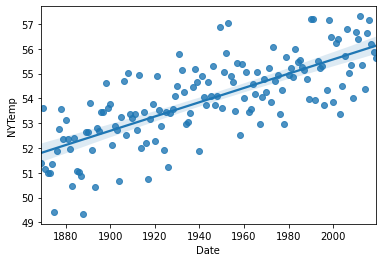

In [11]:
sns.regplot(x=NY_Y.index, y='NYTemp', data=NY_Y);

In [12]:
# It is obvious that New York City yearly mean temperature data is not stationary.
from statsmodels.tsa.stattools import adfuller
adfuller(NY_Y)

(-0.975729593083067,
 0.7620131402538957,
 10,
 140,
 {'1%': -3.4779446621720114,
  '5%': -2.8824156122448983,
  '10%': -2.577901887755102},
 443.5282512226118)

In [13]:
NY_Y.head()

,NYTemp
Date,
1869,51.391667
1870,53.600000
1871,51.133333
1872,50.975000
1873,50.975000


In [14]:
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()

In [15]:
NYC_Temp20=NY_Temp.loc['1995-01-01':'2014-12-01']

In [16]:
climate_m.index=climate_m.index.to_timestamp()
climate_m=climate_m.loc['1995-01-01':'2014-12-01']
climate_m.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,SA_Cape_Town,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,,
1995-01-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,37.829032,73.606452,69.480645,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02-01,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,31.985714,73.017857,70.025000,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03-01,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,44.370968,74.961290,67.977419,64.477419,70.541935,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04-01,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,51.003333,75.420000,60.143333,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05-01,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,61.529032,77.477419,58.658065,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355


In [17]:
NYC_Temp20.describe()

,NYTemp
count,240.000000
mean,55.411667
std,15.465460
min,24.700000
25%,41.450000
50%,55.150000
75%,70.225000
max,81.400000


In [18]:
NYC_m=climate_m[['Vermont_Burlington_Temp', 'Cleveland_Temp','New_York_City']]
NYC_m

,Vermont_Burlington_Temp,Cleveland_Temp,New_York_City
Date,,,
1995-01-01,28.219355,30.325806,37.829032
1995-02-01,19.696429,26.860714,31.985714
1995-03-01,35.119355,40.561290,44.370968
1995-04-01,40.633333,46.496667,51.003333
1995-05-01,56.545161,59.435484,61.529032
...,...,...,...
2014-08-01,68.522581,70.267742,74.438710
2014-09-01,62.190000,63.510000,70.153333
2014-10-01,53.525806,53.580645,60.254839


In [19]:
NYC_m['Month']= pd.DatetimeIndex(NYC_m.index).month
NYC_m

<ipython-input-19-2272524b2b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_m['Month']= pd.DatetimeIndex(NYC_m.index).month


,Vermont_Burlington_Temp,Cleveland_Temp,New_York_City,Month
Date,,,,
1995-01-01,28.219355,30.325806,37.829032,1
1995-02-01,19.696429,26.860714,31.985714,2
1995-03-01,35.119355,40.561290,44.370968,3
1995-04-01,40.633333,46.496667,51.003333,4
1995-05-01,56.545161,59.435484,61.529032,5
...,...,...,...,...
2014-08-01,68.522581,70.267742,74.438710,8
2014-09-01,62.190000,63.510000,70.153333,9
2014-10-01,53.525806,53.580645,60.254839,10


In [20]:
NYC_m['Month']=NYC_m['Month'].astype('str')

<ipython-input-20-456cf397231d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_m['Month']=NYC_m['Month'].astype('str')


In [21]:
NYC_m.dtypes

Vermont_Burlington_Temp    float64
Cleveland_Temp             float64
New_York_City              float64
Month                       object
dtype: object

In [22]:
X=NYC_m[['Vermont_Burlington_Temp','Cleveland_Temp','Month']]
X=dummy=pd.get_dummies(X)
X

,Vermont_Burlington_Temp,Cleveland_Temp,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
Date,,,,,,,,,,,,,,
1995-01-01,28.219355,30.325806,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,19.696429,26.860714,0,0,0,0,1,0,0,0,0,0,0,0
1995-03-01,35.119355,40.561290,0,0,0,0,0,1,0,0,0,0,0,0
1995-04-01,40.633333,46.496667,0,0,0,0,0,0,1,0,0,0,0,0
1995-05-01,56.545161,59.435484,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,68.522581,70.267742,0,0,0,0,0,0,0,0,0,0,1,0
2014-09-01,62.190000,63.510000,0,0,0,0,0,0,0,0,0,0,0,1
2014-10-01,53.525806,53.580645,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
y=NYC_m['New_York_City']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# Just practise the random split of the data. For time series data, we should always use previous data as the training set and the later data as the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [26]:
scaler =StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
X_train_scaled

array([[ 0.82180037,  0.90495926, -0.32294656, ..., -0.26726124,
        -0.29040893,  3.        ],
       [ 0.94875298,  0.86814592, -0.32294656, ..., -0.26726124,
        -0.29040893,  3.        ],
       [-0.74824507, -0.79036101, -0.32294656, ..., -0.26726124,
        -0.29040893, -0.33333333],
       ...,
       [ 0.74722936,  0.66835891, -0.32294656, ..., -0.26726124,
        -0.29040893,  3.        ],
       [ 1.20479968,  1.15634914, -0.32294656, ..., -0.26726124,
         3.44342023, -0.33333333],
       [-1.02401407, -0.82815326, -0.32294656, ..., -0.26726124,
        -0.29040893, -0.33333333]])